# 3.1 - Más testeo de hipótesis

# ANOVA

### testeo de más de dos muestras

**ANOVA** = Análisis de la varianza, es una técnica que permite comparar tres o más medias de distintas muestras independientes.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3=\ldots=\mu_n$

$H1 :$ Al menos una es diferente

Los p_values se sacan con el F-test (F de Snedecor), comparando varianzas. Lo que se busca es una diferencia significativa en al menos uno de los grupos.

In [1]:
# pa pintar
import matplotlib.pyplot as plt
%matplotlib inline

# sospechos habituales
import pandas as pd
import numpy as np

# esto son distribuciones
from scipy.stats import f_oneway, norm, f, chi2, chi2_contingency

# ols = minimos cuadrados ordinarios, regresion lineal
import statsmodels.api as sm
from statsmodels.formula.api import ols

# pa quitar warnings
import warnings
warnings.simplefilter('ignore')

##### F de Snedecor

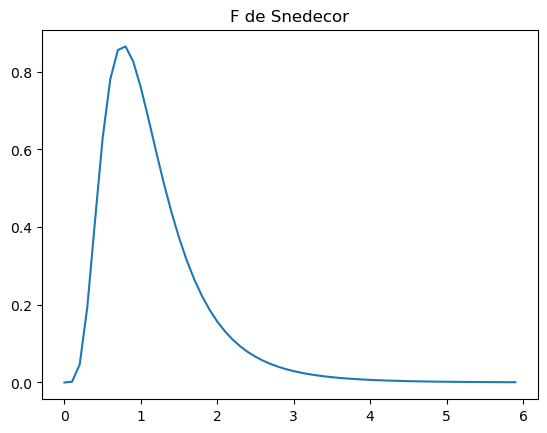

In [2]:
x=[i*.1 for i in range(60)]

plt.plot(x, f(15, 15).pdf(x))
plt.title('F de Snedecor');

In [3]:
x=[i*.1 for i in range(-60, 60)]

y1=[norm.pdf(x, -3, 1) for x in x]
y2=[norm.pdf(x, 1, 2) for x in x]
y3=[norm.pdf(x, 4, 1.5) for x in x]

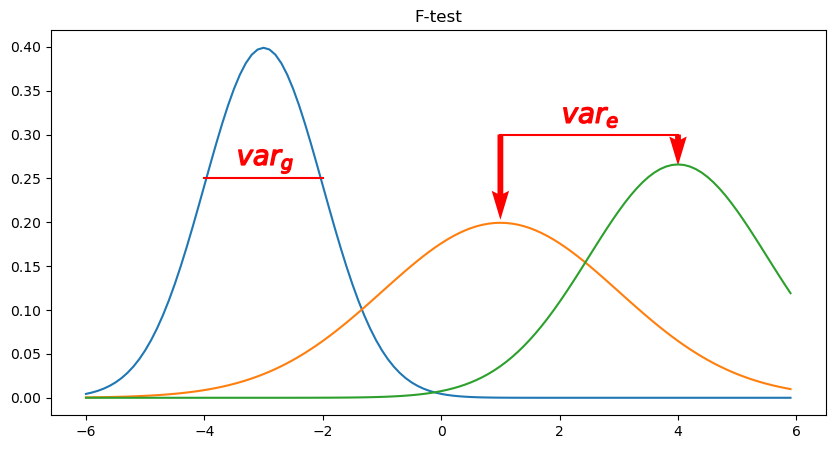

In [4]:
plt.figure(figsize=(10,5))

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.plot(-3, 0.27, marker='$var_g$', color='r', ms=40)
plt.plot(2.5, 0.32, marker='$var_e$', color='r', ms=40)

plt.plot([-4,-3,-2], [.25, .25, .25], color='r')
plt.plot([1,2,3,4], [.3, .3, .3, .3], color='r')

plt.quiver(1, 0.3, 0, -1.1, color='r', scale=10)
plt.quiver(4, 0.3, 0, -0.4, color='r', scale=10)

plt.title('F-test');

$F-test =$ Varianza entre los grupos / Varianza del grupo

$F-test = \frac{\sigma_e^2}{\sigma_g^2}$

### Ejemplo Plantas

**ANOVA One-Way** : Una variable independiente y una dependiente, similaridad basada en la media y en el f_score.


Supongamos que tenemos dos fertilizantes distintos y probamos su eficacia. Se tienen 3 grupos, el grupo de control (no se aplica fertilizante), y un grupo para cada uno de los fertilizantes.

Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3$  (no hay diferencia significativa entre los grupos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un grupo)

In [5]:
df=pd.read_csv('../data/PlantGrowth.csv')

df.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [6]:
df.group.unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [7]:
df.weight[df.group=='ctrl']

0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64

In [8]:
grupos = df.group.unique()

In [9]:
data = {g: df.weight[df.group==g] for g in grupos}

data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64,
 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64,
 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [12]:
f_score, pvalue = f_oneway(data['ctrl'], data['trt1'], data['trt2'])

f_score, pvalue

(4.846087862380136, 0.0159099583256229)

**Conclusion**

$p_v < 0.05$, se rechaza H0. Existe una diferencia significativa en al menos un grupo.

In [13]:
data['ctrl'].mean(), data['ctrl'].std()

(5.031999999999999, 0.5830913783924057)

In [14]:
data['trt1'].mean(), data['trt1'].std()

(4.661, 0.7936756964347034)

In [15]:
data['trt2'].mean(), data['trt2'].std()

(5.526, 0.44257328332278606)

In [16]:
from scipy.stats import ttest_ind

ttest_ind(data['ctrl'], data['trt1'])

Ttest_indResult(statistic=1.1912603818487009, pvalue=0.2490231659730067)

In [17]:
ttest_ind(data['ctrl'], data['trt2'])

Ttest_indResult(statistic=-2.1340204531240654, pvalue=0.04685138491157358)

In [18]:
ttest_ind(data['trt1'], data['trt2'])

Ttest_indResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574)

### Ejemplo Ciudades

Se tiene un rating de 6 ciudades diferentes.

Las hipótesis son:

$H0 : \mu_1=\ldots=\mu_6$  (no hay diferencia significativa entre las ciudades)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos una ciudad)

In [19]:
rate=pd.read_csv('../data/rate_by_city.csv')

rate.head()

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1


In [20]:
rate.City.unique()

array([1, 2, 3, 4, 5, 6])

In [23]:
rate[rate.City==4]

,Rate,City
27,15.00,4
28,14.00,4
29,13.75,4
30,13.59,4
31,13.25,4
32,12.97,4
33,12.50,4
34,12.25,4
35,11.89,4


In [25]:
rate['index'] = rate.groupby('City').cumcount()

rate.head()

,Rate,City,index
0,13.75,1,0
1,13.75,1,1
2,13.50,1,2
3,13.50,1,3
4,13.00,1,4


In [27]:
rate_pivot = rate.pivot_table(columns='City', values='Rate', index='index')

rate_pivot

City,1,2,3,4,5,6
index,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [28]:
rate.shape

(54, 3)

In [29]:
rate_pivot.shape

(9, 6)

In [31]:
rate_pivot[3]

index
0    14.00
1    14.00
2    13.51
3    13.50
4    13.50
5    13.25
6    13.00
7    12.50
8    12.50
Name: 3, dtype: float64

In [33]:
# f_oneway(rate_pivot[1], rate_pivot[2]...........)

# el asterisco es entrada de N elementos


f_oneway(*[rate_pivot[i] for i in range(1, 7)])


F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)

In [36]:
# sin construir la pivot table


f_oneway(*[rate[rate.City==i].Rate for i in range(1,7)])

F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)

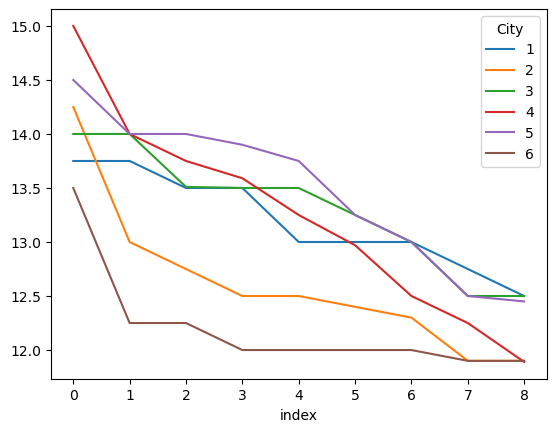

In [37]:
rate_pivot.plot();

**Conclusion**

$p_v < 0.05$, se rechaza H0. Existe una diferencia significativa en al menos una ciudad.

In [38]:
# con statsmodels

formula = 'Rate ~ C(City)'   # y=mx+b    

# La variable Rate va como (o es proporcional a) la categoria ciudad

# C() significa categoria, ~ es el va como...

In [39]:
# ols = ordinary least squares (minimos cuadrados ordinarios)


modelo = ols(formula=formula, data=rate).fit()   # saca m y b 

anova = sm.stats.anova_lm(modelo, typ=1)    # typ=1 significas one way

anova

,df,sum_sq,mean_sq,F,PR(>F)
C(City),5.0,10.945667,2.189133,4.829385,0.001175
Residual,48.0,21.758133,0.453294,NaN,NaN


##### F-test a mano

In [40]:
data=np.array([[1,2,3], [4,5,6], [7,8,9]]).T   # data fake
data

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [41]:
n=data.shape[0]
m=data.shape[1]


media = data.mean()

col_medias = data.mean(axis=0)   # media por muestra

s_c_entre_grupos = (((col_medias-media)**2)*n).sum()
dof_sceg=m-1

s_c_grupo= ((data-col_medias)**2).sum()
dof_scg=(n-1)*m

In [42]:
f_score = (s_c_entre_grupos/dof_sceg) / (s_c_grupo/dof_scg)

f_score

27.0

In [43]:
1 - f(dof_sceg, dof_scg).cdf(f_score)

0.0010000000000000009

##### con scipy

In [44]:
f_oneway(data[:, 0], data[:, 1], data[:, 2])

F_onewayResult(statistic=27.0, pvalue=0.0010000000000000002)

### Ejemplo Campo


**ANOVA Two-Way** : Dos variables independientes categoricas y una dependiente continua.


Supongamos que se tienen datos de produccion de un campo, y ademas los datos del tipo de fertilizante y cantidad de agua usada.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\ldots=\mu_n$  (no hay diferencia significativa entre campos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un campo)

In [45]:
df=pd.read_csv('../data/crop_yield.csv')

df.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [46]:
df.Fert.unique()

array(['A', 'B'], dtype=object)

In [47]:
df.Water.unique()

array(['High', 'Low'], dtype=object)

In [48]:
df.Yield

0     27.4
1     33.6
2     29.8
3     35.2
4     33.0
5     34.8
6     27.0
7     30.2
8     30.8
9     26.4
10    32.0
11    32.2
12    26.0
13    33.4
14    26.4
15    26.8
16    23.2
17    29.4
18    19.4
19    23.8
Name: Yield, dtype: float64

In [49]:
formula = 'Yield ~ C(Fert) + C(Water)'


modelo = ols(formula, df).fit()

modelo

In [50]:
modelo.fvalue   # f_score

5.430482726711909

In [51]:
modelo.f_pvalue    # p-valor, al menos uno de los 4 es distinto

0.015008885925143444

In [52]:
anova = sm.stats.anova_lm(modelo, typ=2)     # typ=2 significa two way

anova   # la importancia de fert y water, los pvalores

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.669070,0.029228
C(Water),63.368,1.0,5.191895,0.035887
Residual,207.488,17.0,NaN,NaN


### MANOVA (ANOVA Multivariante)

In [53]:
from statsmodels.multivariate.manova import MANOVA

In [54]:
df=pd.read_csv('../data/iris.csv')

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [55]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [56]:
df.columns=df.columns.str.replace('.', '_')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [58]:
formula = 'sepal_length + sepal_width + petal_length + petal_width ~ C(variety)'

# variedad = m1x1 + m2x2 + m3x3 + m4x4 + b

In [59]:
manova = MANOVA.from_formula(formula, df)

manova

In [61]:
print(manova.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       C(variety)        Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

### $\chi^2$

**ji-dos, chi-dos, chi-cuadrado...**

**Independencia (H0: Si, H1: No)**

In [62]:
chi2_contingency

<function scipy.stats.contingency.chi2_contingency(observed, correction=True, lambda_=None)>

In [63]:
rate_pivot[[1,3]]

City,1,3
index,,
0,13.75,14.00
1,13.75,14.00
2,13.50,13.51
3,13.50,13.50
4,13.00,13.50
5,13.00,13.25
6,13.00,13.00
7,12.75,12.50
8,12.50,12.50


In [65]:
ji_dos, pval, dof, ex = chi2_contingency(rate_pivot[[1,3]])

pval

0.9999999998848639

**Conclusion**

$p_v > 0.05$, no se rechaza H0, son independientes.

**para una poblacion que tenga dos variables categoricas**

**¿Existe asociacion significativa entre las dos?  (H0: No, H1: Si)**

In [66]:
df=pd.read_csv('../data/chi-test.csv')

df.head()

,Gender,Like Shopping?
0,Male,No
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes


In [69]:
cross = pd.crosstab(df.Gender, df['Like Shopping?'])


cross

Like Shopping?,No,Yes
Gender,,
Female,2,3
Male,2,2


In [70]:
ji_dos, pval, dof, ex = chi2_contingency(cross)

pval

1.0

In [73]:
dof

1

In [74]:
# a mano

chi_square = ([(f-e)**2./e for f,e in zip(cross.values, ex)])

chi_statistic=sum(chi_square)

p_value = 1 - chi2.cdf(x=chi_statistic, df=dof)

p_value

array([0.82306327, 0.84148058])

**Conclusion**

$p_v > 0.05$, no se rechaza H0, no existe asociacion significativa entre los grupos.